In [104]:
#!pip install imblearn

   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   ---------------------------------------  256.0/258.0 kB 7.7 MB/s eta 0:00:01
   ---------------------------------------- 258.0/258.0 kB 5.3 MB/s eta 0:00:00


In [55]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,accuracy_score

# Preprocessing 

In [6]:
df=pd.read_csv("train.csv")
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [8]:
df.shape

(45211, 11)

In [9]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

There is no null values from the given data 

In [10]:
df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [11]:
df.duplicated().sum()

6

There are 6 duplicates in the data 

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [14]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


In [15]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS

In [16]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

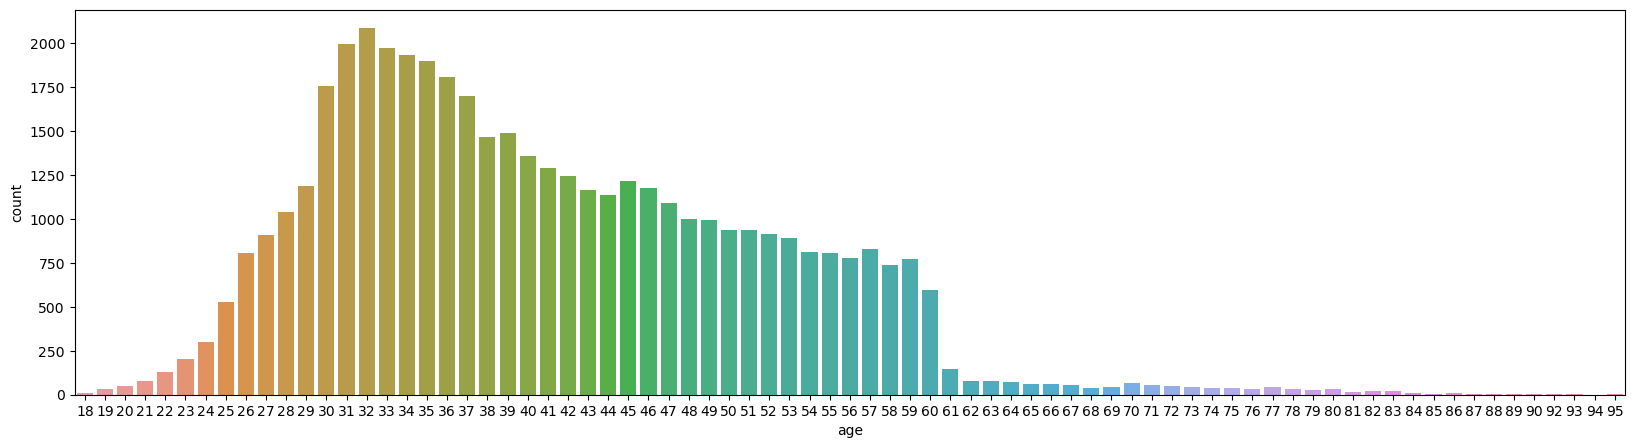

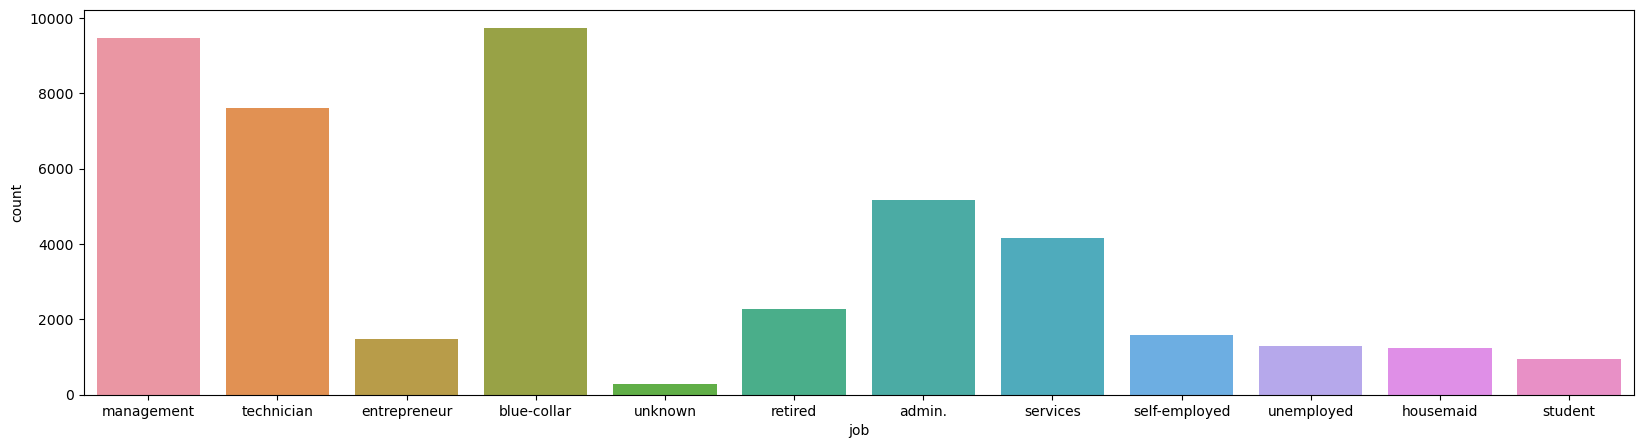

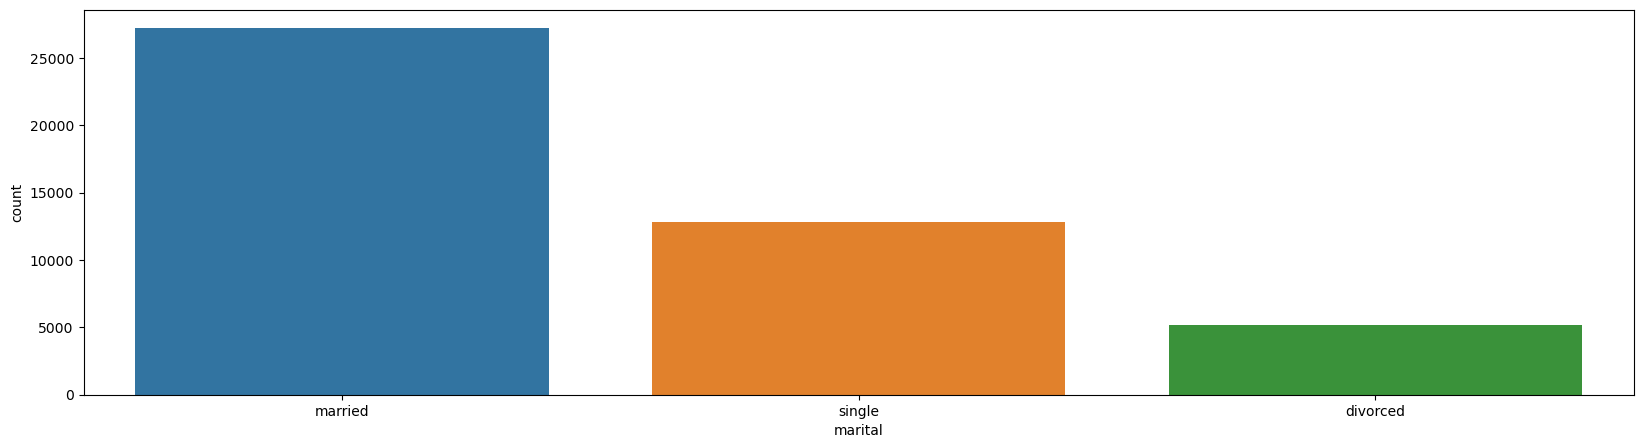

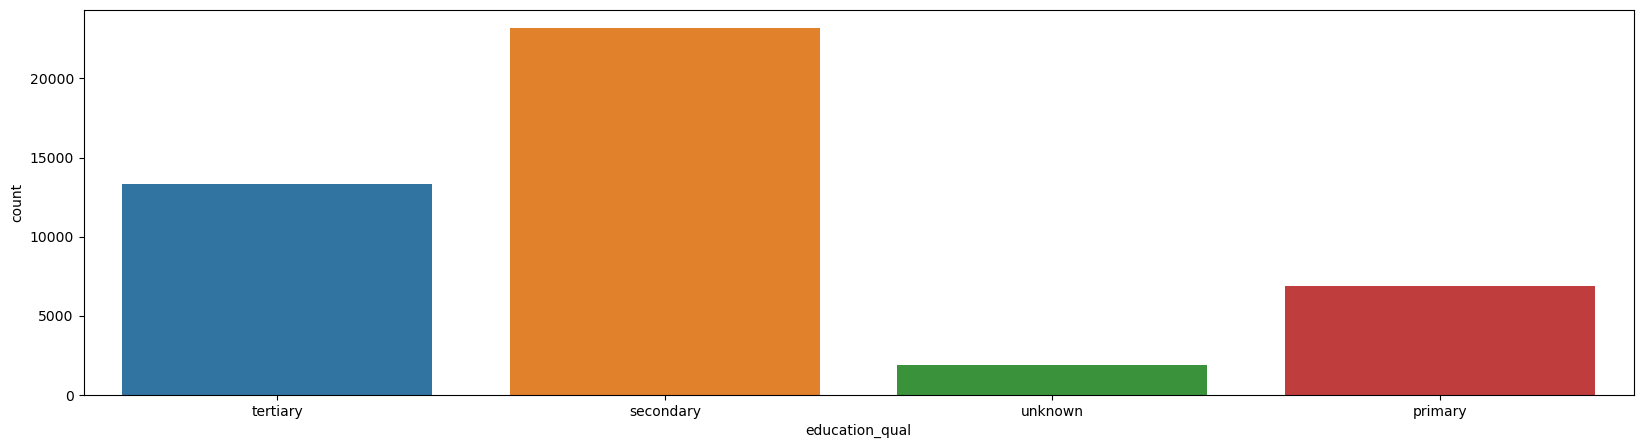

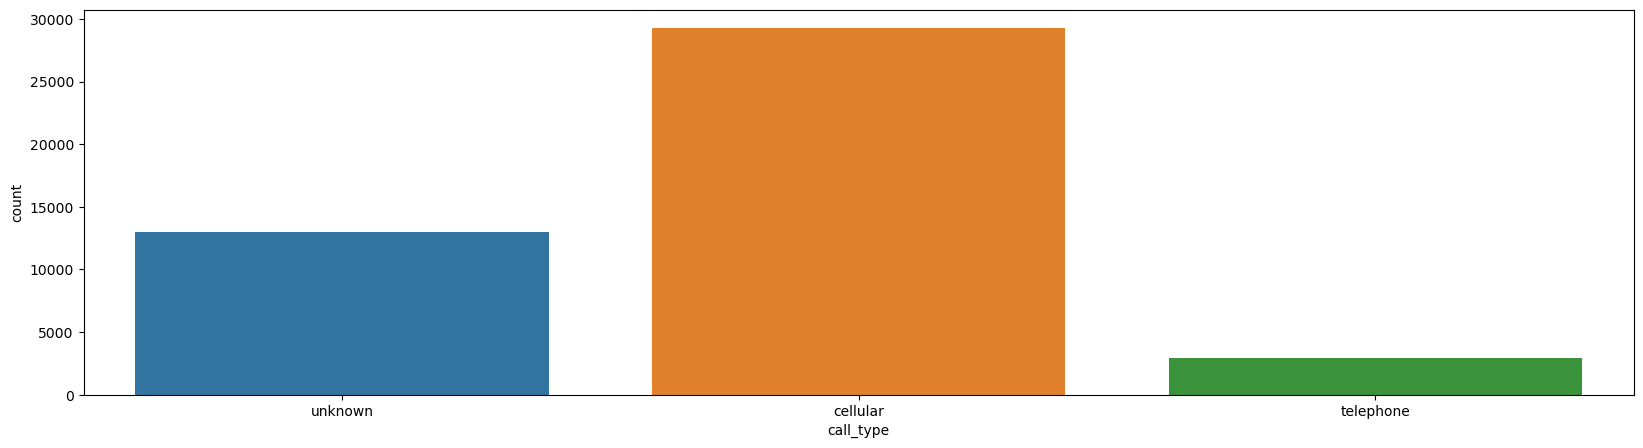

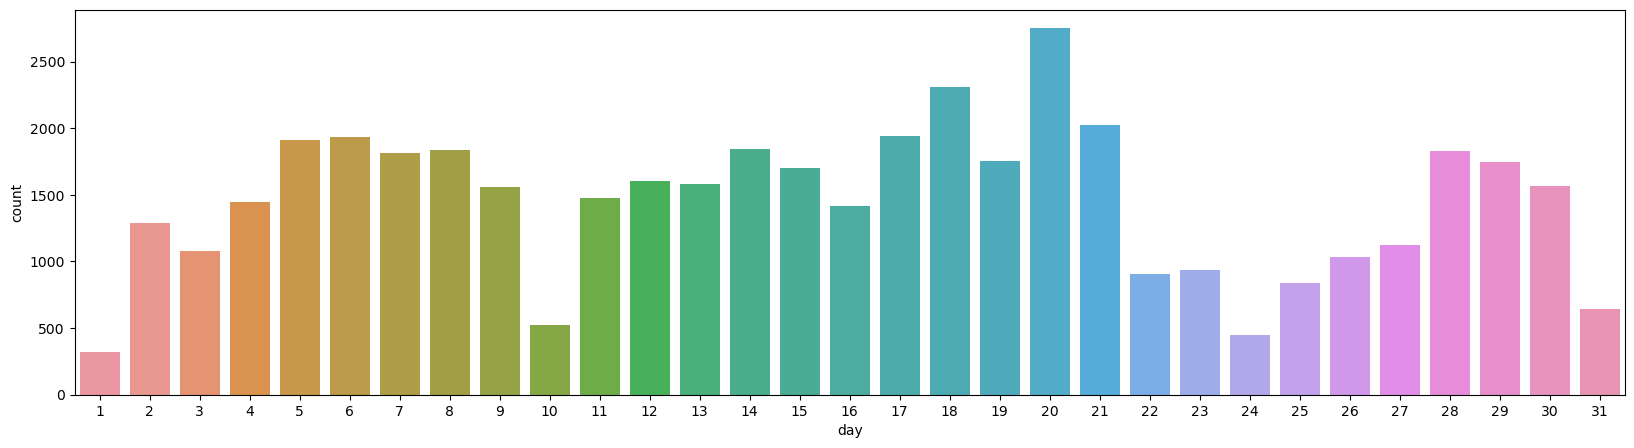

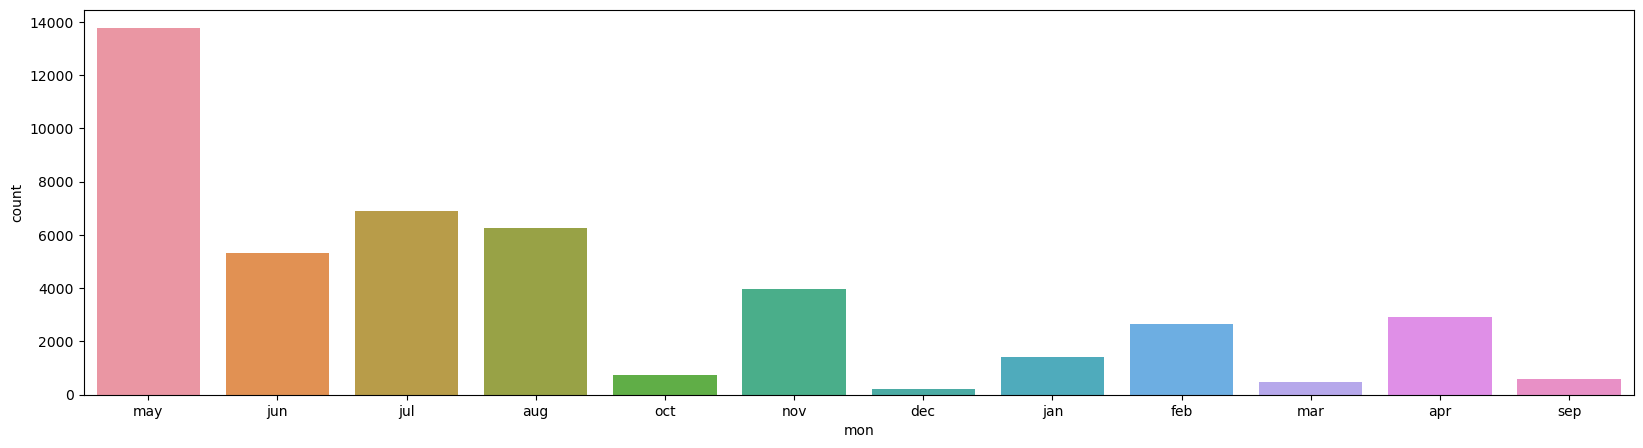

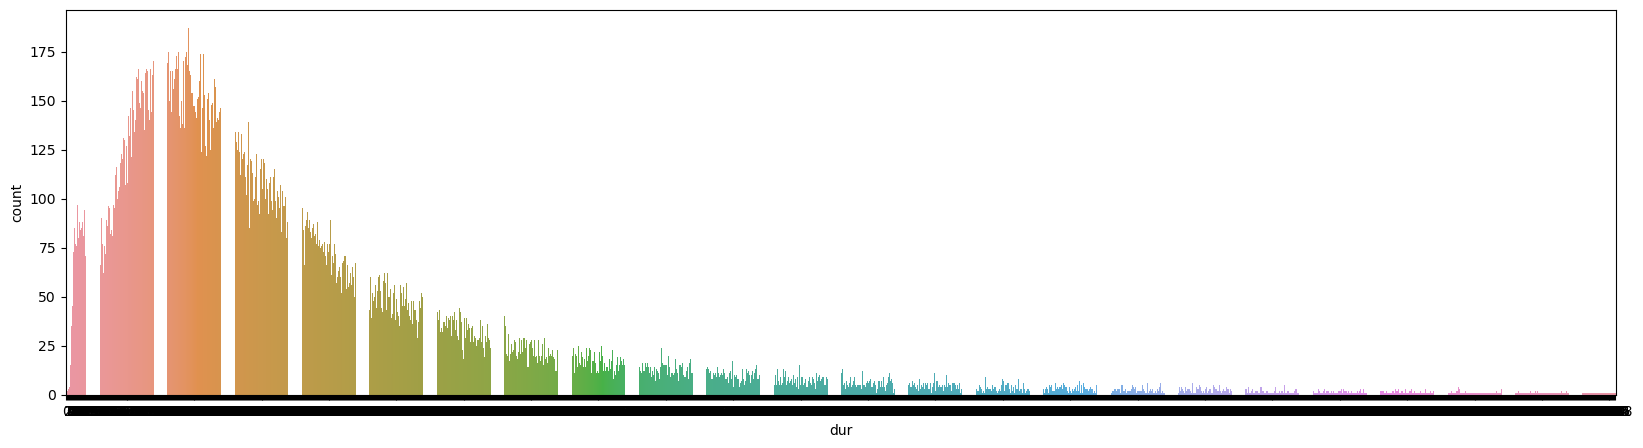

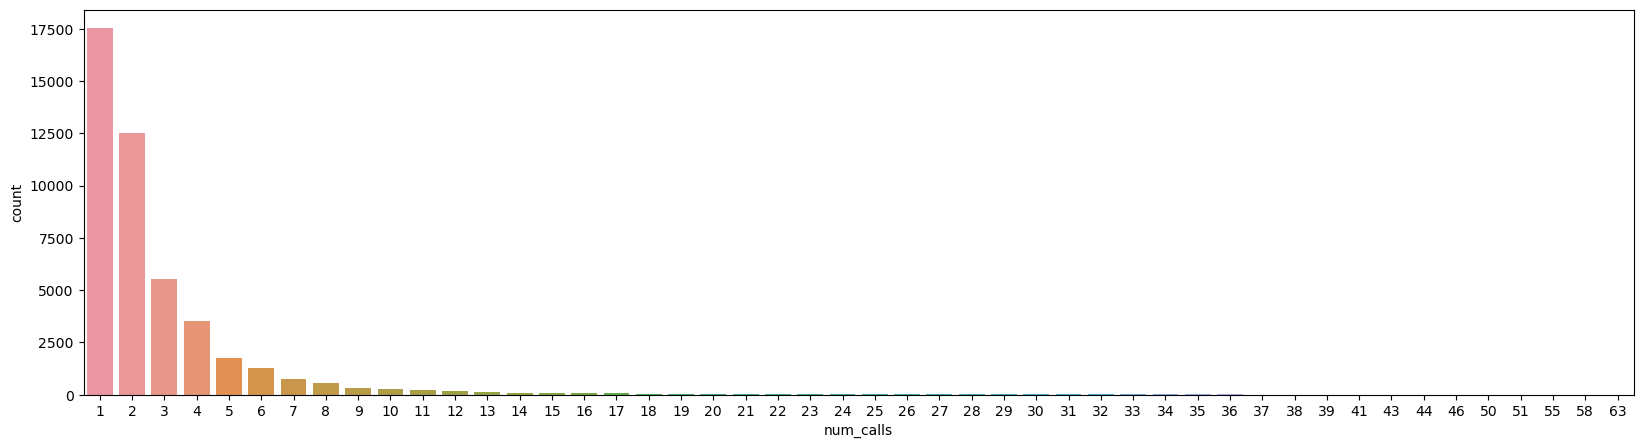

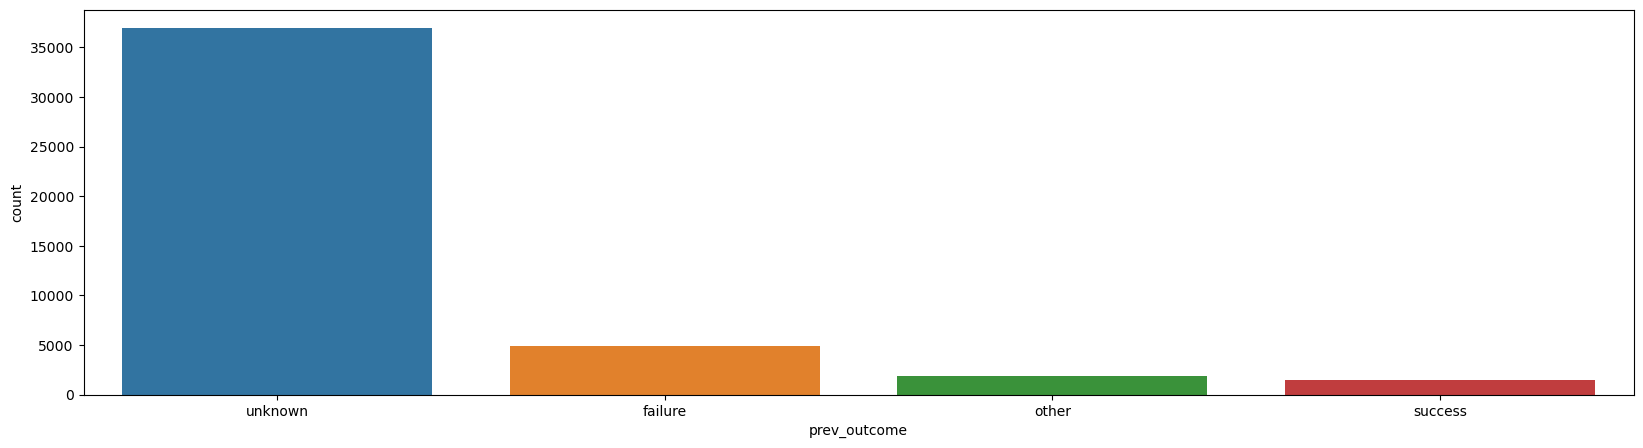

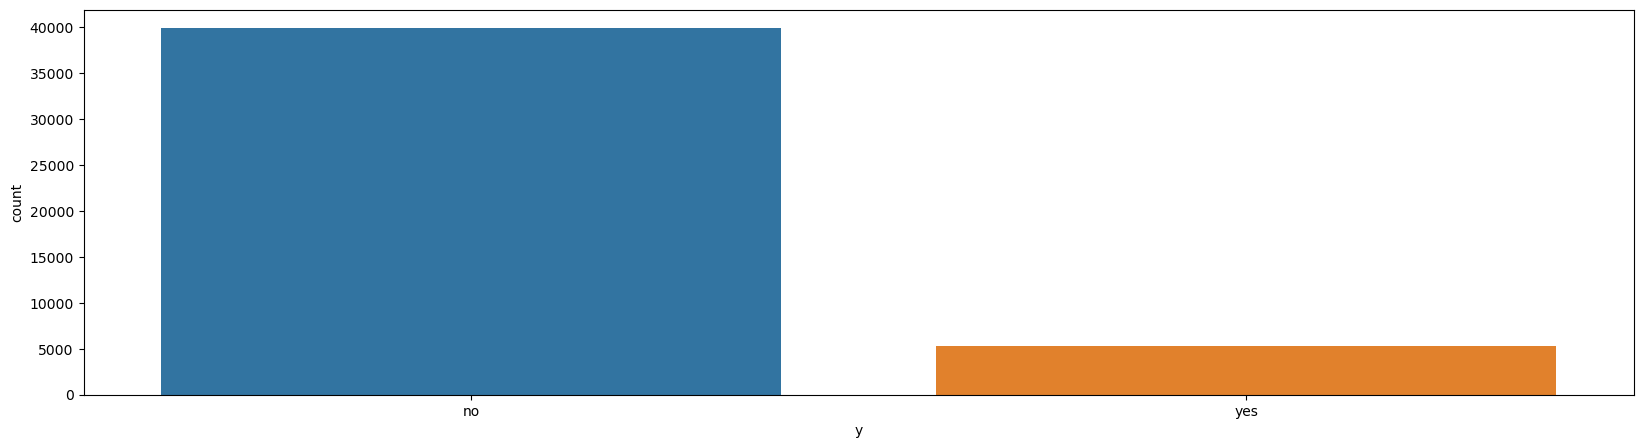

In [19]:
for i in df.columns:
  plt.figure(figsize = (20,5))
  sns.countplot(x=df[i])


C:\Users\VIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 2000x500 with 0 Axes>

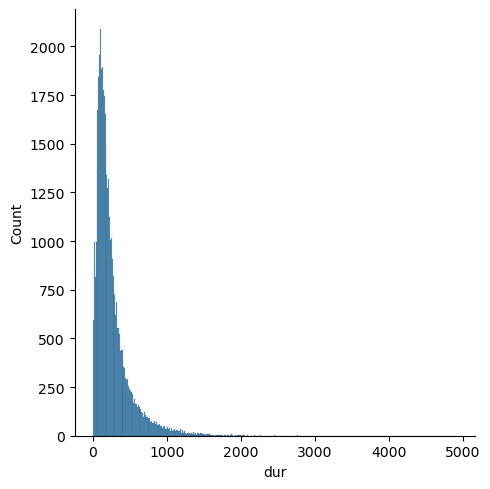

In [18]:
plt.figure(figsize=(20,5))
sns.displot(x=df.dur, kind='hist')

plt.show()

<Axes: xlabel='dur', ylabel='Count'>

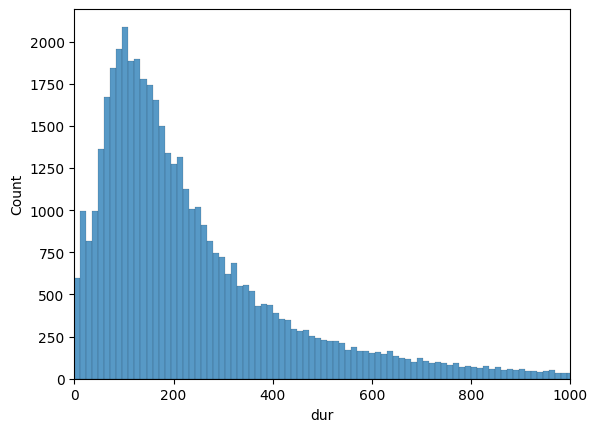

In [137]:
fig, ax = plt.subplots()

b = sns.histplot(df.dur, ax=ax)
ax.set_xlim(0, 1000)
b
     

**OBSERVATIONS**
What the Insurance Company has done so far

Middle aged men (i.e 30-35 age) are targeted more.
Blue Collar and Management people are targeted high.
More calls are made to the married.
People who have done their Secondary educations are called more.
Cellular type calls are made more.
Most number of calls have been made on the 20th day of the month.
High number of calls are made in the May month than any other month.
Mostly they are calling once only. Average number of calls is 3.
Most of the previous outcome of the calls are unknown.
Mean duration of the calls is 100 secs.
Only few people have subscribed to the insurance. i.e data is highly imbalanced.

# Encoding

In [20]:
df['y'].value_counts()

y
no     39916
yes     5289
Name: count, dtype: int64

In [21]:
df.y = df.y.map({'no':0, 'yes':1})

In [22]:
df.mon.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [23]:
df.mon = df.mon.map({'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'jan':1, 'feb':2,'mar':3, 'apr':4, 'sep':9})
     

In [24]:
df.education_qual.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [25]:
df.education_qual = df.education_qual.map({'tertiary':3, 'secondary':2, 'unknown':0, 'primary':1})

In [26]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [27]:
df.marital = df.marital.map({'married':24, 'single':16, 'divorced':32})

In [28]:
df.call_type = df.call_type.map({'unknown':0, 'cellular':1, 'telephone':2})

In [29]:
df.dtypes

age                int64
job               object
marital            int64
education_qual     int64
call_type          int64
day                int64
mon                int64
dur                int64
num_calls          int64
prev_outcome      object
y                  int64
dtype: object

In [30]:
df.prev_outcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [31]:
df.prev_outcome = df.prev_outcome.map({'unknown':2, 'failure':0, 'other':3, 'success':1})

In [32]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [33]:
le = LabelEncoder()
t = le.fit_transform(df.job)
t

array([4, 9, 2, ..., 5, 1, 2])

In [34]:
df.job=t

In [35]:
df.job.unique()

array([ 4,  9,  2,  1, 11,  5,  0,  7,  6, 10,  3,  8])

In [36]:
df.dtypes

age               int64
job               int32
marital           int64
education_qual    int64
call_type         int64
day               int64
mon               int64
dur               int64
num_calls         int64
prev_outcome      int64
y                 int64
dtype: object

In [37]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [38]:
df.duplicated().sum()

0

In [39]:
df.shape

(45205, 11)

# Splitting X and y

In [40]:
X=df.drop('y',axis=1)
y=df['y']

In [41]:
X.shape,y.shape

((45205, 10), (45205,))

In [42]:
X_train,X_eval,y_train,y_eval=train_test_split(X,y,test_size=0.2,random_state=42)

Class 0: 39916
Class 1: 5289
Proportion of class 0 is  88.3 %


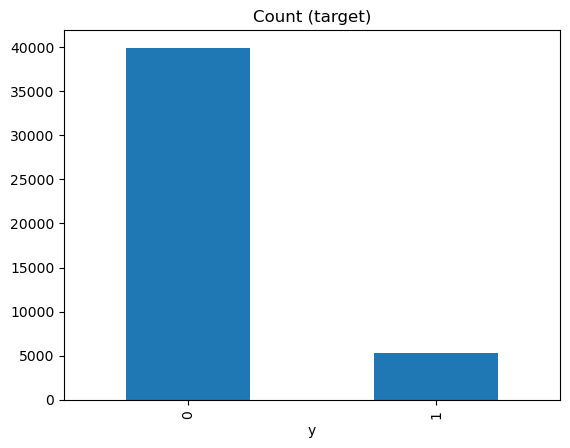

In [45]:
target_count = df.y.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')

target_count.plot(kind='bar', title='Count (target)');

Class 0: 31961
Class 1: 4203
Proportion of class 0 is  88.38 %


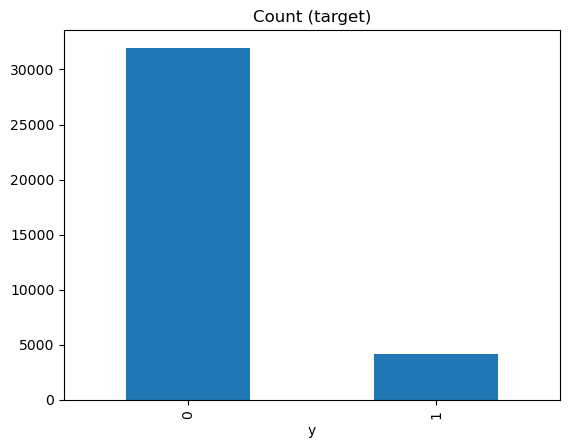

In [46]:
target_count = y_train.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')

target_count.plot(kind='bar', title='Count (target)');

In [47]:
smote = SMOTE(sampling_strategy = 'minority')
X_smote , y_smote = smote.fit_resample(X_train,y_train)

Class 0: 31961
Class 1: 31961
Proportion of class 0 is  50.0 %


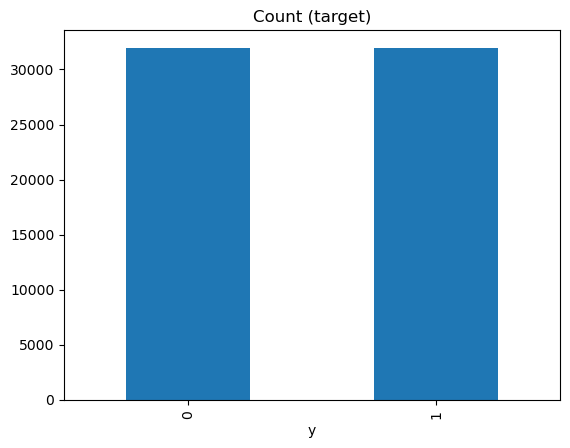

In [48]:
target_count = y_smote.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')

target_count.plot(kind='bar', title='Count (target)');

# Logestic Regression 

In [49]:
X_smote.shape,y_smote.shape,X_eval.shape,y_eval.shape

((63922, 10), (63922,), (9041, 10), (9041,))

In [56]:
lr=LogisticRegression(max_iter=1000)
lr.fit(X_smote,y_smote)
yhat=lr.predict(X_eval)
accuracy=accuracy_score(y_eval,yhat)
print("accuracy",accuracy)
f1=f1_score(y_eval,yhat)
print("F1_score",f1)
recall=recall_score(y_eval,yhat)
print("recall_Score",recall)
precision=precision_score(y_eval,yhat)
print("precision_score",precision)
print("Confusion_Matrix :")
confusion=confusion_matrix(y_eval,yhat)
print(confusion)

accuracy 0.7795597832098219
F1_score 0.4291034087653967
recall_Score 0.6896869244935543
precision_score 0.31143451143451145
Confusion_Matrix :
[[6299 1656]
 [ 337  749]]


# K-Nearest Neighbor Classifier

In [58]:
knc=KNeighborsClassifier()
knc.fit(X_smote,y_smote)
yhat_knc=lr.predict(X_eval)
accuracy_knc=accuracy_score(y_eval,yhat_knc)
print("accuracy",accuracy_knc)
f1_knc=f1_score(y_eval,yhat_knc)
print("F1_score",f1_knc)
recall_knc=recall_score(y_eval,yhat_knc)
print("recall_Score",recall_knc)
precision_knc=precision_score(y_eval,yhat_knc)
print("precision_score",precision_knc)
print("Confusion_Matrix :")
confusion_knc=confusion_matrix(y_eval,yhat_knc)
print(confusion_knc)

accuracy 0.7795597832098219
F1_score 0.4291034087653967
recall_Score 0.6896869244935543
precision_score 0.31143451143451145
Confusion_Matrix :
[[6299 1656]
 [ 337  749]]


# Random Forest Classifier 

In [60]:
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_smote,y_smote)
yhat_rfc=lr.predict(X_eval)
accuracy_rfc=accuracy_score(y_eval,yhat_rfc)
print("accuracy",accuracy_rfc)
f1_rfc=f1_score(y_eval,yhat_rfc)
print("F1_score",f1_rfc)
recall_rfc=recall_score(y_eval,yhat)
print("recall_Score",recall_rfc)
precision_rfc=precision_score(y_eval,yhat_rfc)
print("precision_score",precision_rfc)
print("Confusion_Matrix :")
confusion_rfc=confusion_matrix(y_eval,yhat_rfc)
print(confusion_rfc)

accuracy 0.7795597832098219
F1_score 0.4291034087653967
recall_Score 0.6896869244935543
precision_score 0.31143451143451145
Confusion_Matrix :
[[6299 1656]
 [ 337  749]]
